In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras.activations import linear, relu, sigmoid # type: ignore

In [2]:
def rmse(y, yhat):
    n, m = y.shape
    diff = y - yhat
    err = np.sqrt(np.sum(diff**2, axis=1)) 
    return np.sum(err) / n

In [4]:
data = pd.read_excel("simulated_data.xlsx")
data.shape

(7776, 305)

In [5]:
X = data.iloc[:, :300]
y = data.iloc[:, 300:]
print(X.shape)
print(y.shape)

(7776, 300)
(7776, 5)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(6220, 300) (1556, 300)
(6220, 5) (1556, 5)


In [52]:
tf.random.set_seed(707)
model = Sequential(
    [
        tf.keras.layers.InputLayer((300,)),
        Dense(150, activation="relu", name="L1"),
        Dense(75, activation="relu", name="L2"),
        Dense(35, activation="relu", name="L3"),
        Dense(15, activation="relu", name="L4"),
        Dense(5, activation="linear", name="L5")
    ]
)
model.compile(optimizer='adam', loss='mse') 

In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 150)               45150     
                                                                 
 L2 (Dense)                  (None, 75)                11325     
                                                                 
 L3 (Dense)                  (None, 35)                2660      
                                                                 
 L4 (Dense)                  (None, 15)                540       
                                                                 
 L5 (Dense)                  (None, 5)                 80        
                                                                 
Total params: 59755 (233.42 KB)
Trainable params: 59755 (233.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
195/195 [==============================] - 2s 3ms/step - loss: 0.0314
Epoch 2/50
195/195 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 3/50
195/195 [==============================] - 0s 2ms/step - loss: 0.0238
Epoch 4/50
195/195 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 5/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0212
Epoch 6/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0213
Epoch 7/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0207
Epoch 8/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0198
Epoch 9/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0196
Epoch 10/50
195/195 [==============================] - 1s 4ms/step - loss: 0.0191
Epoch 11/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0189
Epoch 12/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0185
Epoch 13/50
195/195 [====

In [55]:
model.evaluate(X_train, y_train)

195/195 [==============================] - 0s 2ms/step - loss: 0.0142


0.014249774627387524

## **Training Set**

In [56]:
yhat = model.predict(X_train)
yhat = pd.DataFrame(yhat)
yhat

195/195 [==============================] - 0s 2ms/step


,0,1,2,3,4
0,0.218963,0.185280,0.217528,0.101733,0.214404
1,0.213380,0.162209,0.101921,0.130574,0.273593
2,0.073561,0.287914,0.625968,0.026222,0.143540
3,0.246486,0.316524,0.500990,0.064862,0.264865
4,0.168267,0.105791,0.557372,0.054690,0.038258
...,...,...,...,...,...
6215,0.185232,0.205533,0.485430,0.089870,0.236974
6216,0.165196,0.278923,0.549889,0.017245,0.227334
6217,0.206529,0.022499,1.313414,0.130498,0.224630
6218,0.175667,0.231692,0.623251,0.072739,0.213202


In [57]:
y_train

,v2,a2,IP3,d5,k3
7196,0.161549,0.249941,0.098905,0.109698,0.157024
1362,0.233976,0.250560,0.098905,0.109698,0.272739
7315,0.161549,0.249941,0.678186,0.004980,0.039951
6147,0.293397,0.339615,0.432218,0.046061,0.225123
6955,0.161549,0.134219,0.098905,0.004980,0.039951
...,...,...,...,...,...
4931,0.217040,0.339615,0.320078,0.109698,0.140326
3264,0.131523,0.249941,0.571412,0.046061,0.272739
1653,0.233976,0.036026,1.364390,0.109698,0.225123
2607,0.131523,0.250560,0.571412,0.120110,0.225123


In [58]:
rmse(np.array(y_train), np.array(yhat))

0.21577132749216185

## **Test Set**

In [59]:
yhat_test = model.predict(X_test)
yhat_test = pd.DataFrame(yhat_test)
yhat_test

49/49 [==============================] - 0s 2ms/step


,0,1,2,3,4
0,0.214598,0.018974,0.596058,0.128941,0.252277
1,0.221261,0.356011,1.035197,0.041062,0.256155
2,0.220660,0.190400,0.168765,0.116626,0.222716
3,0.094382,0.359868,0.860077,0.017460,0.143270
4,0.186909,0.113155,1.366617,0.148585,0.197641
...,...,...,...,...,...
1551,0.212334,0.224708,0.079771,0.124513,0.242760
1552,0.142203,0.324222,0.151527,0.081681,0.128367
1553,0.196344,0.065484,0.078022,0.178925,0.240214
1554,0.218125,0.277168,0.518789,0.095429,0.238190


In [60]:
y_test

,v2,a2,IP3,d5,k3
5430,0.293397,0.036026,0.571412,0.109698,0.272739
5172,0.217040,0.401870,0.678186,0.046061,0.272739
6532,0.161549,0.250560,0.098905,0.120110,0.200704
2707,0.131523,0.250560,1.364390,0.004980,0.039951
5821,0.293397,0.134219,0.678186,0.046061,0.039951
...,...,...,...,...,...
6334,0.293397,0.401870,0.098905,0.109698,0.200704
3710,0.131523,0.401870,0.098905,0.186241,0.157024
1551,0.233976,0.036026,0.098905,0.186241,0.225123
4569,0.217040,0.249941,0.571412,0.109698,0.225123


In [61]:
rmse(np.array(y_test), np.array(yhat_test))

0.22955744329120883

## **Error**

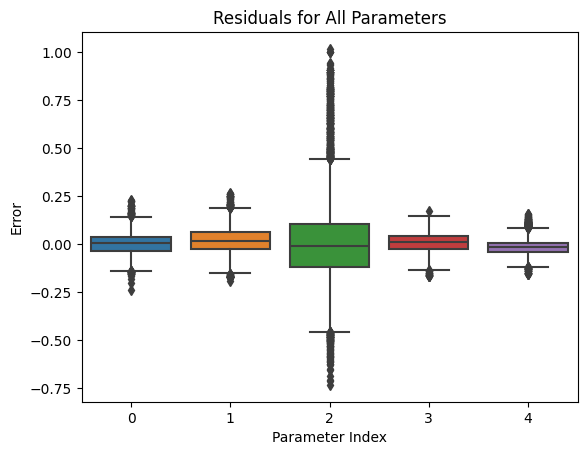

In [62]:
residuals = np.array(y_train) - np.array(yhat)
sns.boxplot(data=residuals)
plt.title('Residuals for All Parameters')
plt.xlabel('Parameter Index')
plt.ylabel('Error')
plt.show()

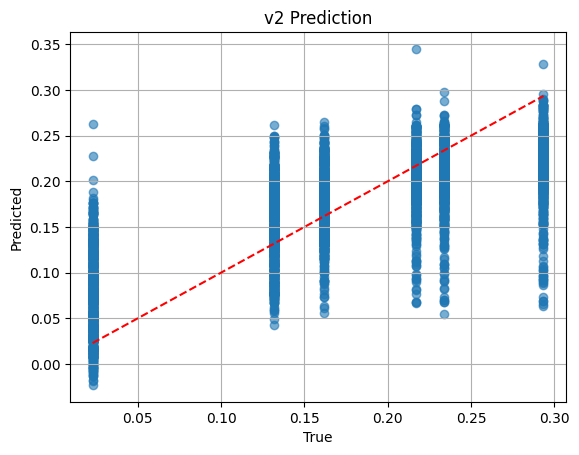

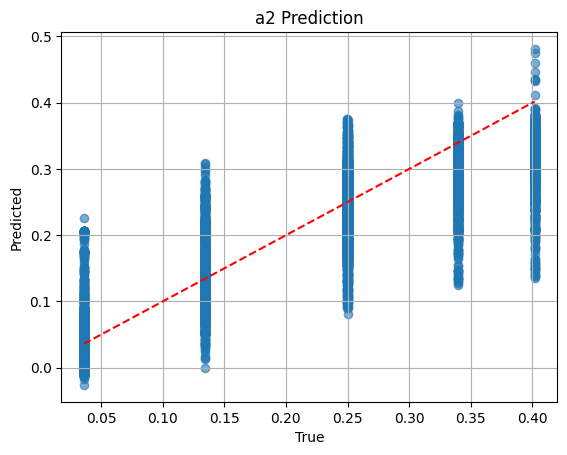

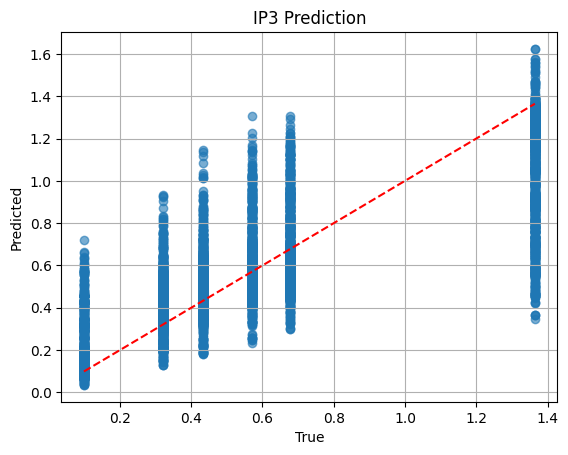

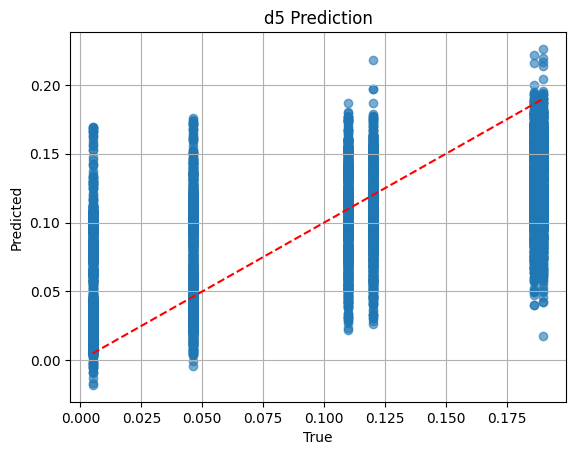

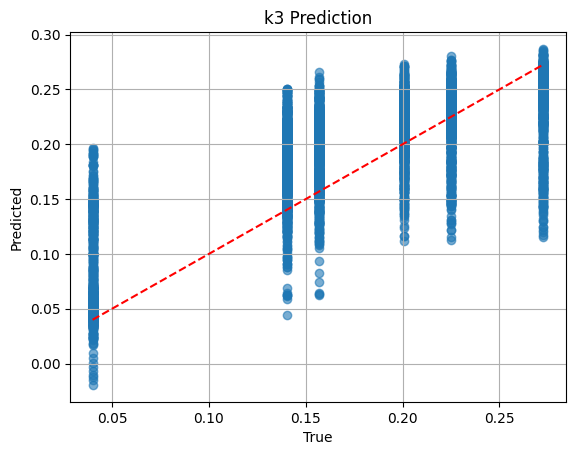

In [63]:
y_true = np.array(y_train)
y_pred = np.array(yhat)

for i in range(5):
    plt.figure()
    plt.scatter(y_true[:, i], y_pred[:, i], alpha=0.6)
    plt.plot([y_true[:, i].min(), y_true[:, i].max()],
             [y_true[:, i].min(), y_true[:, i].max()], 'r--')  # perfect prediction line
    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.title(f'{y_train.columns[i]} Prediction')
    plt.grid(True)
    plt.show()